In [4]:
#Install datareader
!pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to c:\users\itsne\appdata\local\temp\pip-req-build-qa14pinw
  Resolved https://github.com/pydata/pandas-datareader.git to commit 4ff62149bb24f72d62874477b6688ddb0fd1f97c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pandas-datareader: filename=pandas_datareader-0.11.0.dev76+g4ff6214-py3-none-any.whl size=115812 sha256=544bab222c4261e8e1b3d377d793a26969617c906116b41e78295e30165edf1c
  Stored in directory: C:\Users\itsne\AppData\Local\Temp\pip-ephem-wheel-cache-_2zd1mr_\wheels\2d\68\8e\e1010a3883907d684bb81e33ffef012bfe48af730344cb5b19
Successfully built pandas-datareader
  Attempting uninstall: pandas-datareader
    Found existing 

  Running command git clone --filter=blob:none --quiet https://github.com/pydata/pandas-datareader.git 'C:\Users\itsne\AppData\Local\Temp\pip-req-build-qa14pinw'


In [59]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
tesla_df=pdr.get_data_stooq('TSLA')

## Data Snapshot -Tesla (TSLA)
**Source**:
- Stooq 

**Coverage period**:
- Jan 2021 - Jan 2026
- Frequency: Daily trading days

**Validated coverage**
- Earliest date: 2021-01-08
- Latest date: 2026-01-06


In [15]:
tesla_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-14,281.130,287.667,279.583,281.667,93798981
2021-01-13,284.253,286.823,277.333,284.803,99937488
2021-01-12,277.000,289.333,275.780,283.147,138812160
2021-01-11,283.133,284.810,267.874,270.397,178662438
2021-01-08,285.333,294.830,279.463,293.340,225166584


In [10]:
tesla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2026-01-06,446.38,448.2500,428.78,432.96,89093758
2026-01-05,447.99,457.5499,444.57,451.67,67940839
2026-01-02,457.80,458.3400,435.30,438.07,85535406
2025-12-31,456.10,456.5500,449.30,449.72,49077961
2025-12-30,461.09,463.1200,453.83,454.43,59238464


 The DataFrame is currently sorted in **descending order by date**.  
- `.head()` shows the **most recent records (2026)**  
- `.tail()` shows the **earliest records (2021)**  

For analyses requiring chronological order, we will **sort the index in ascending order**.

In [30]:
tesla_df.index = pd.to_datetime(tesla_df.index)
tesla_df = tesla_df.sort_index()      

## Tesla (TSLA) — High Price Trend Analysis

**Overview:**  
Tesla’s daily high prices from Jan 2021 to Jan 2026 show steady trends with a notable spike during late 2024 to early 2025.


**Objective:**  
- To analyze Tesla’s **recent performance**, we focus on the last 2 years (Jan 2024 – Jan 2026).
  
**Key Observation:**  
- Prices spiked significantly between **Nov 2024 and Mar 2025**, suggesting increased market activity or impactful events.


**Method:**  
- The `High` price is plotted with:
  - `xlim` set to the last 2 years  
  - `ylim` limited to 0–600 for better visibility  
  - Green dashed line (`c='green', ls='--'`) to highlight trends

<Axes: title={'center': 'Tesla Daily High Prices (2021–2026)'}, xlabel='Date', ylabel='Price (USD)'>

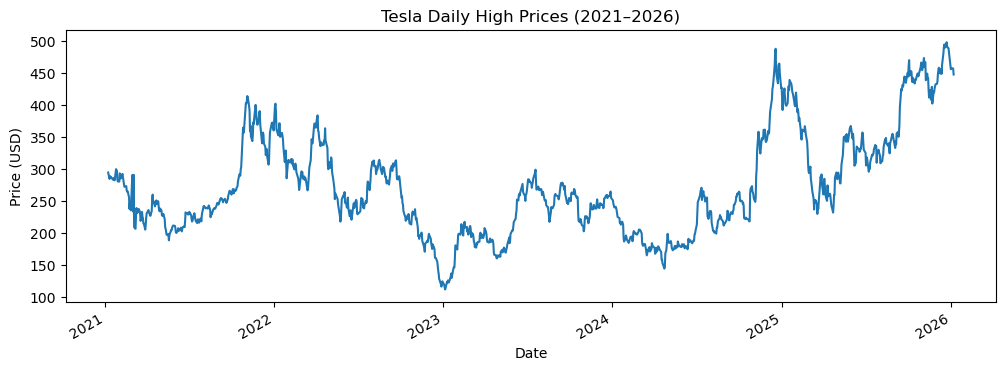

In [34]:
tesla_df['High'].plot(figsize=(12,4), title="Tesla Daily High Prices (2021–2026)", ylabel="Price (USD)")

<Axes: xlabel='Date'>

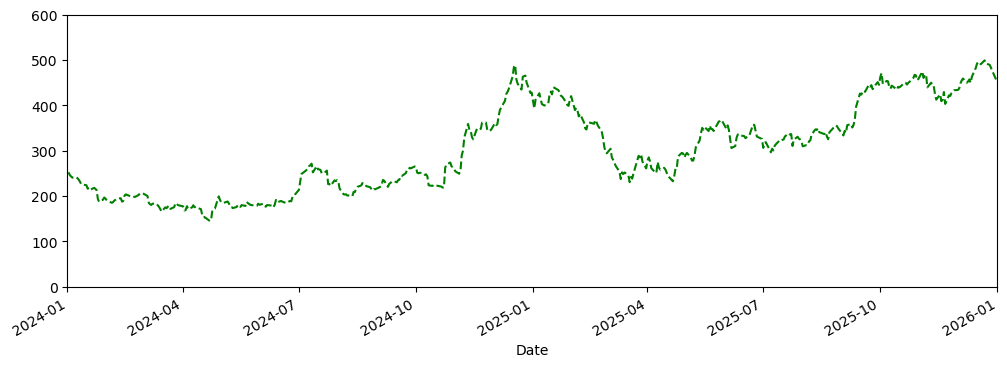

In [24]:
#Applying x limit and y limit and color
tesla_df['High'].plot(xlim=['2024-01-01','2026-01-01'], ylim=[0,600],figsize=(12,4), c='green', ls='--')

In [40]:
spike=tesla_df.loc['2024-11-01':'2025-03-01']

In [41]:
peak_price = spike['High'].max()
avg_price = spike['High'].mean()
daily_volatility = (spike['High'] - spike['Low']).mean()
percent_change = ((spike['High'].max() - spike['High'].iloc[0]) / spike['High'].iloc[0]) * 100

In [44]:
print(f"Spike Metrics (Nov 2024 – Mar 2025):")
print(f"- Peak High Price: ${peak_price:.2f}")
print(f"- Average High Price: ${avg_price:.2f}")
print(f"- Average Daily Volatility (High-Low): ${daily_volatility:.2f}")
print(f"- Percent Change from start to peak high price: {percent_change:.2f}%")

Spike Metrics (Nov 2024 – Mar 2025):
- Peak High Price: $488.54
- Average High Price: $381.34
- Average Daily Volatility (High-Low): $19.07
- Percent Change from start to peak high price: 92.34%


**Spike Insight (Nov 2024 – Mar 2025):**  
- Tesla’s daily high price surged by **92.34%** from the start of the spike to the peak, representing a **substantial short-term rally**.  
- Daily price swings (~$19) indicate **high volatility**, highlighting increased market activity and risk exposure.  
- The surge is notable relative to prior trends and may reflect **company events or market sentiment**, suggesting potential **opportunities and risks for investors and portfolio strategies**.


## Time ReSampling

- Resampling is been aligned to **business-end periods**, capturing only trading days.  
- Monthly, quarterly, and annual metrics now reflect real market activity, providing a **true view of trends, peaks, and volatility**.

In [71]:
monthly_avg_high = tesla_df['High'].resample('BME').mean()
quarterly_max_high = tesla_df['High'].resample('BQE').max()
annual_avg_high = tesla_df['High'].resample('BYE').mean()
annual_max_high = tesla_df['High'].resample('BYE').max()

Text(0, 0.5, 'Price (USD)')

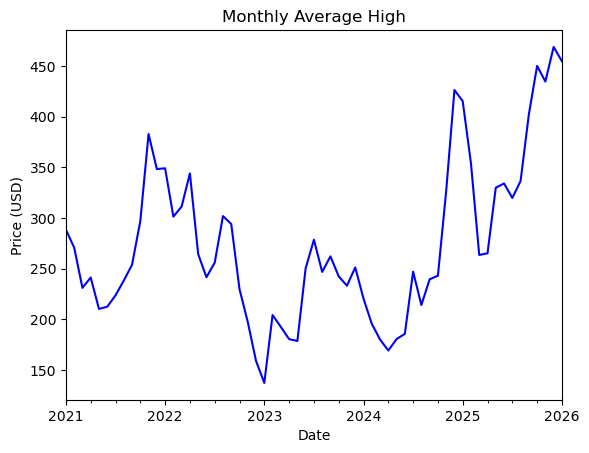

In [72]:
#Monthly Average of High Prices
monthly_avg_high.plot(title="Monthly Average High", color='blue')
plt.ylabel("Price (USD)")

Text(0, 0.5, 'Price (USD)')

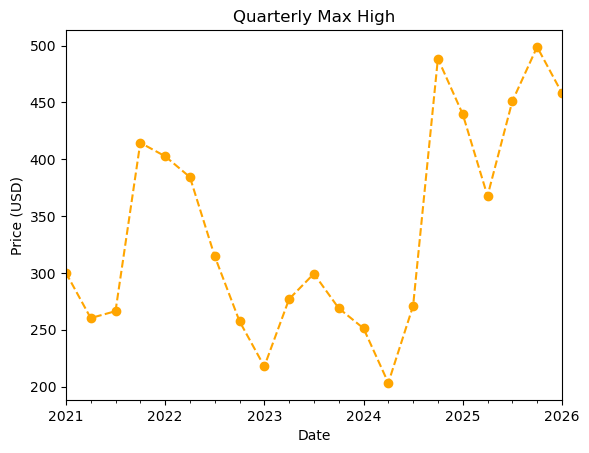

In [73]:
#Quarterly Maximum High Prices
quarterly_max_high.plot(title="Quarterly Max High", color='orange', linestyle='--', marker='o')
plt.ylabel("Price (USD)")

Text(0, 0.5, 'Price (USD)')

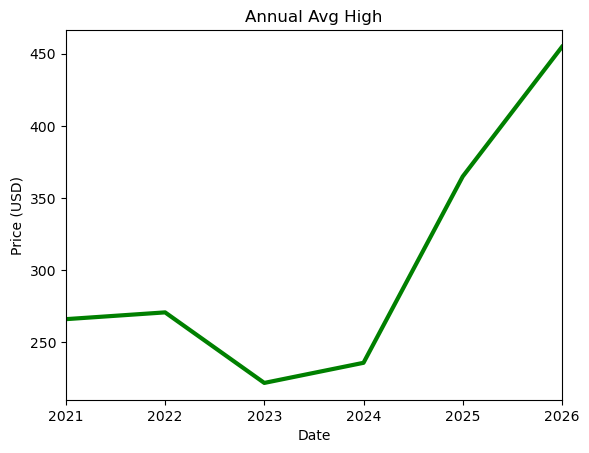

In [74]:
#Annual Average High Prices
annual_avg_high.plot(title="Annual Avg High", color='green', linewidth=3)
plt.ylabel("Price (USD)")

Text(0, 0.5, 'Price (USD)')

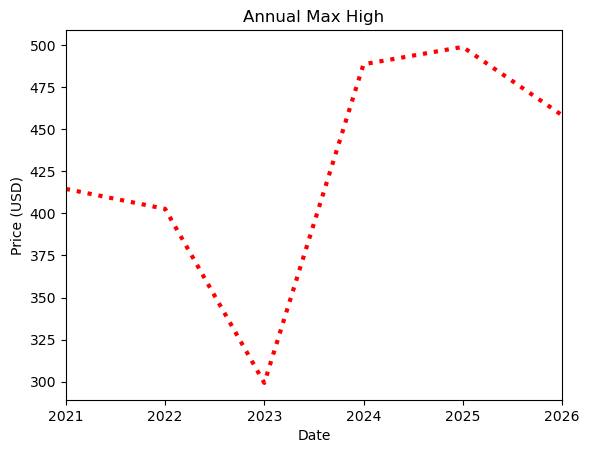

In [75]:
#Annual Maximum High Prices
annual_max_high.plot(title="Annual Max High", color='red', linestyle=':', linewidth=3)
plt.ylabel("Price (USD)")

## Daily Return (%)
- Shows the percentage gain or loss for each trading day. This helps us understand **short-term performance, market momentum, and volatility**, and can be aggregated to evaluate weekly, monthly, or quarterly trends.
- Spikes in daily return correspond to **short-term rallies or corrections**, such as Q1 2023, Nov 2024–Mar 2025, and Q1 2025.
- Aggregating daily returns over these periods confirms the trend, showing **average positive returns and elevated volatility**, consistent with the High-price spike analysis.
- Understanding daily return behavior complements the **High, Low, Open, and Close price analysis**, giving a **complete picture of Tesla’s trading dynamics and market sentiment**.


In [78]:
tesla_df['Daily_Return'] = (tesla_df['Close'] - tesla_df['Open']) / tesla_df['Open'] * 100

In [79]:
tesla_df.head()

,Open,High,Low,Close,Volume,Daily_Return
Date,,,,,,
2021-01-08,285.333,294.830,279.463,293.340,225166584,2.806195
2021-01-11,283.133,284.810,267.874,270.397,178662438,-4.498239
2021-01-12,277.000,289.333,275.780,283.147,138812160,2.219134
2021-01-13,284.253,286.823,277.333,284.803,99937488,0.193490
2021-01-14,281.130,287.667,279.583,281.667,93798981,0.191015


In [82]:
monthly_avg_return = tesla_df['Daily_Return'].resample('BME').mean()
quarterly_avg_return = tesla_df['Daily_Return'].resample('BQE').mean()
annual_avg_return = tesla_df['Daily_Return'].resample('BYE').mean()

<Axes: title={'center': 'Monthly Average Return'}, xlabel='Date', ylabel='Price(USD)'>

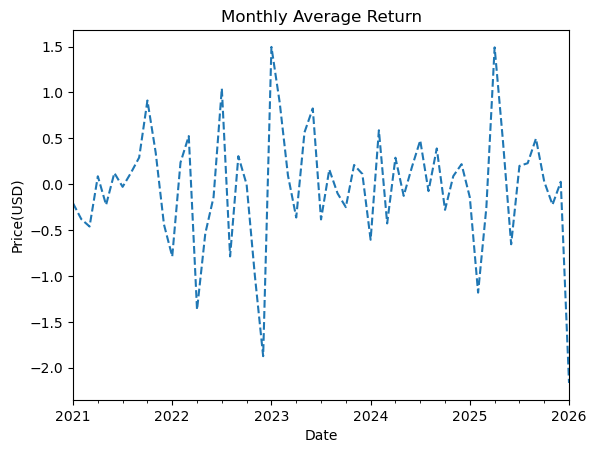

In [83]:
monthly_avg_return.plot(title="Monthly Average Return", ls="--", ylabel="Price(USD)")

<Axes: title={'center': 'Quarterly Average Return'}, xlabel='Date', ylabel='Price(USD)'>

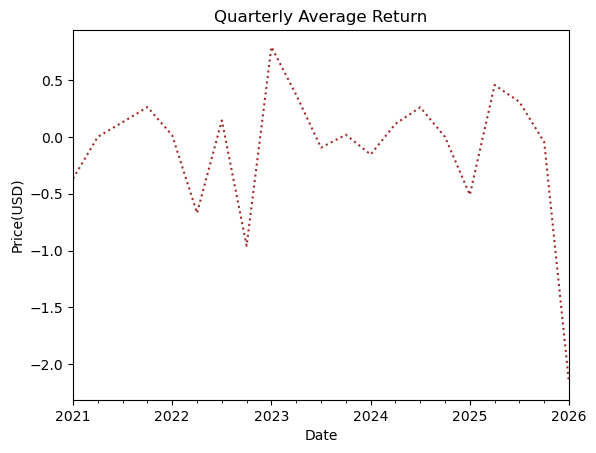

In [87]:
quarterly_avg_return.plot(title="Quarterly Average Return", ylabel="Price(USD)", ls=":", c="brown")

<Axes: title={'center': 'Annual Average Return'}, xlabel='Date', ylabel='Price(USD)'>

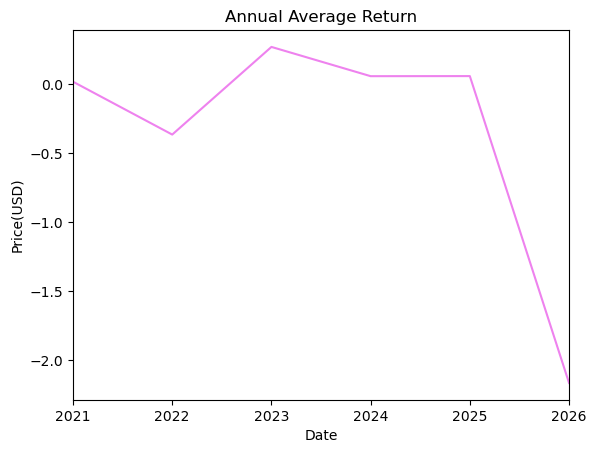

In [85]:
annual_avg_return.plot(title="Annual Average Return", ylabel="Price(USD)", c="violet")

## Short-Term Spike Periods Identified from Daily Returns

- Based on the **daily return analysis and resampled trends**, we identified periods of **significant short-term rallies**.  
- For Tesla (TSLA), these include **Q1 2023** and **Q1 2025**, where daily returns spiked and volatility increased.  
- The following data slices isolate these periods for further analysis of **Open, Close, High, and Low metrics**.


In [98]:
# Q1 2023 spike
q1_2023_spike = tesla_df.loc['2023-01-01':'2023-03-31']

# Q1 2025 spike
q1_2025_spike = tesla_df.loc['2025-01-01':'2025-03-30']

In [99]:
def spike_metrics(df):
    return {
        "Avg_Open": df['Open'].mean(),
        "Avg_Close": df['Close'].mean(),
        "Avg_Daily_Return": df['Daily_Return'].mean(),
        "Volatility": (df['High'] - df['Low']).mean(),
        "Peak_High": df['High'].max(),
        "Percent_Change": ((df['High'].max() - df['High'].iloc[0]) / df['High'].iloc[0]) * 100
    }

metrics_q1_2023 = spike_metrics(q1_2023_spike)
metrics_q1_2025 = spike_metrics(q1_2025_spike)


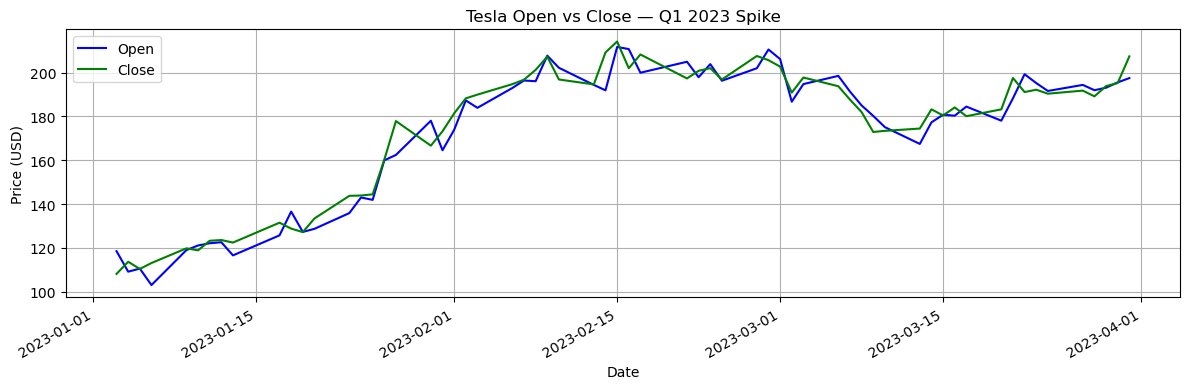

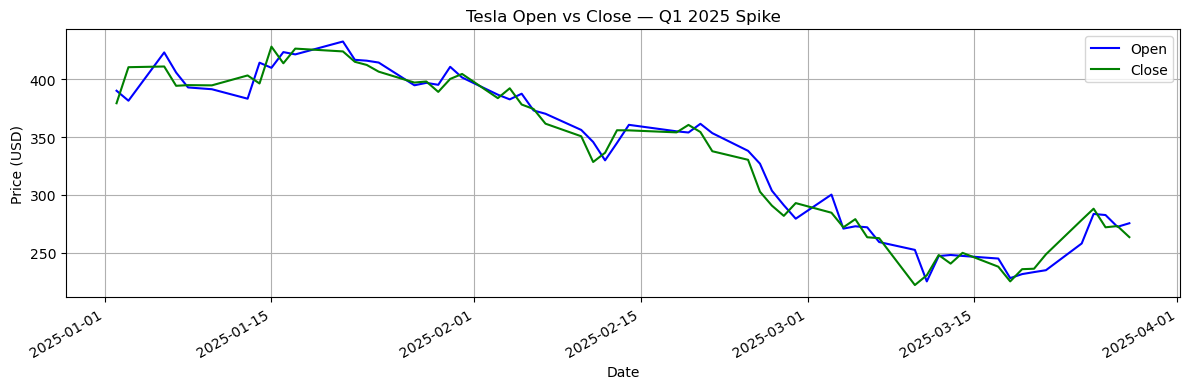

In [100]:
for spike_df, title in [(q1_2023_spike, "Q1 2023"), (q1_2025_spike, "Q1 2025")]:
    plt.figure(figsize=(12,4))
    spike_df['Open'].plot(label='Open',color='blue')
    spike_df['Close'].plot(title='Close', color='green')
    plt.title(f"Tesla Open vs Close — {title} Spike")
    plt.ylabel("Price (USD)")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### 30-Day Rolling Average — Open Price

- A **30-day rolling average** of Tesla’s Open price smooths out short-term fluctuations, providing a **clearer view of underlying trends**.  
- By averaging over the past 30 trading days, we can **identify sustained momentum** or shifts in market sentiment without being distracted by daily noise.  
- This helps executives and analysts **spot medium-term trends** and make more informed decisions based on **smoothed, trend-focused data** rather than daily volatility.


In [103]:
tesla_df["Open : 30 days rolling"]=tesla_df['Open'].rolling(window=30).mean()

In [105]:
tesla_df.head(32)

,Open,High,Low,Close,Volume,Daily_Return,Open : 30 days rolling
Date,,,,,,,
2021-01-08,285.333,294.830,279.463,293.340,225166584,2.806195,NaN
2021-01-11,283.133,284.810,267.874,270.397,178662438,-4.498239,NaN
2021-01-12,277.000,289.333,275.780,283.147,138812160,2.219134,NaN
2021-01-13,284.253,286.823,277.333,284.803,99937488,0.193490,NaN
2021-01-14,281.130,287.667,279.583,281.667,93798981,0.191015,NaN
2021-01-15,284.000,286.633,273.033,275.387,116332788,-3.032746,NaN
2021-01-19,279.267,283.333,277.667,281.517,76100940,0.805681,NaN
2021-01-20,286.247,286.500,279.093,283.483,76997649,-0.965600,NaN
2021-01-21,285.000,285.240,280.473,281.663,61794399,-1.170877,NaN


<Axes: xlabel='Date'>

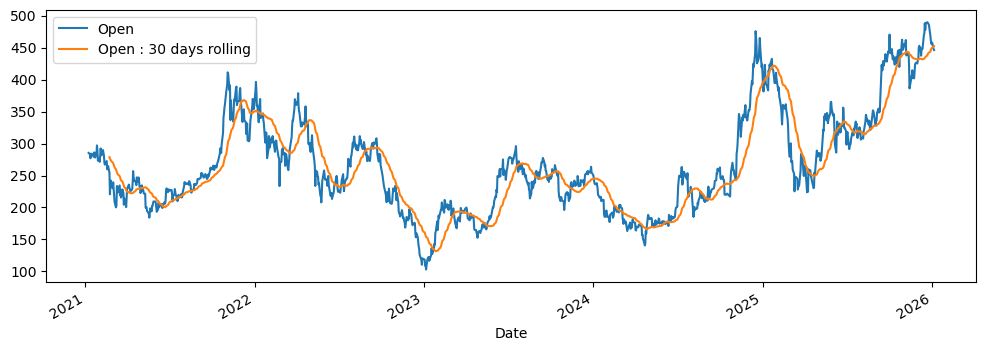

In [109]:
tesla_df[['Open','Open : 30 days rolling']].plot(figsize=(12,4))

### Conclusion

- Tesla’s historical trading data from Jan 2021 to Jan 2026 reveals **multiple short-term rallies**, including Q1 2023, Nov 2024–Mar 2025, and Q1 2025, characterized by high daily returns and volatility.  
- Daily returns and spike analyses highlight **periods of opportunity and elevated risk**, useful for timing or strategy decisions.  
- The 30-day rolling average of Open (and Close) prices provides a **smoothed, trend-focused view**, helping executives identify **medium-term momentum** without being distracted by daily fluctuations.  
- Overall, this analysis provides a **comprehensive, executive-friendly view** of Tesla’s performance, volatility, and trading patterns over the past five years.